In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic_df = pd.read_csv("titanic.csv") 

In [5]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [8]:
titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [11]:
titanic_df = titanic_df.replace("male",1)

In [12]:
titanic_df = titanic_df.replace("female",0)

In [49]:
titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [14]:
titanic_df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

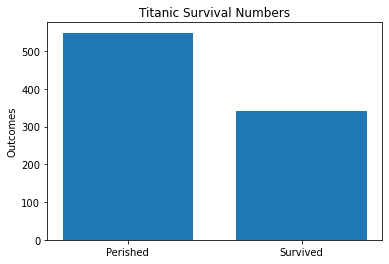

In [64]:
counts = titanic_df['Survived'].value_counts()
outcomes = (titanic_df['Survived'])

w = 0.15
plt.bar(x=[0,.2], height = counts, width =w)
plt.xticks([0,.2], ("Perished", "Survived"))
plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')
plt.show()

In [61]:
PClass_avg = titanic_df["Pclass"].mean()
print(PClass_avg)

2.308641975308642


In [62]:
Sex_avg = titanic_df["Sex"].mean()
print(Sex_avg)

0.6475869809203143


In [36]:
Age_avg = titanic_df["Age"].mean()
print(Age_avg)

In [37]:
SibSp_avg = titanic_df["SibSp"].mean()
print(SibSp_avg)

In [38]:
Parch_avg = titanic_df["Parch"].mean()
print(Parch_avg)

In [39]:
Fare_avg = titanic_df["Fare"].mean()
print(Fare_avg)

In [63]:
Survived_avg = titanic_df["Survived"].mean()
print(Survived_avg)

0.3838383838383838


In [65]:
group_titanic = titanic_df.groupby("Survived")
mean_titanic_df = group_titanic.mean()
print(mean_titanic_df)

            Pclass       Sex        Age     SibSp     Parch       Fare
Survived                                                              
0         2.531876  0.852459  30.626179  0.553734  0.329690  22.117887
1         1.950292  0.318713  28.343690  0.473684  0.464912  48.395408


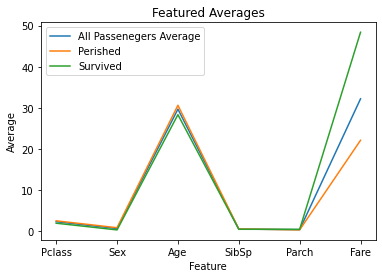

In [69]:
graphTitanic = titanic_df.groupby(titanic_df["Survived"]).mean()
TransTitanic = graphTitanic.T

TitanicAvg = titanic_df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].mean()
TransTitanic['All Passengers Average'] = TitanicAvg
plt.plot(TransTitanic['All Passengers Average'], label = 'All Passenegers Average')
plt.plot(TransTitanic[0], label = 'Perished')
plt.plot(TransTitanic[1], label = 'Survived')
plt.title("Featured Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()
plt.show()

In [77]:
col = TransTitanic.columns.tolist()
col = [col[-1]] + col[:-1]
TransTitanic = TransTitanic[col]
dtitanic = TransTitanic.T
dtitanic

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408
All Passengers Average,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208


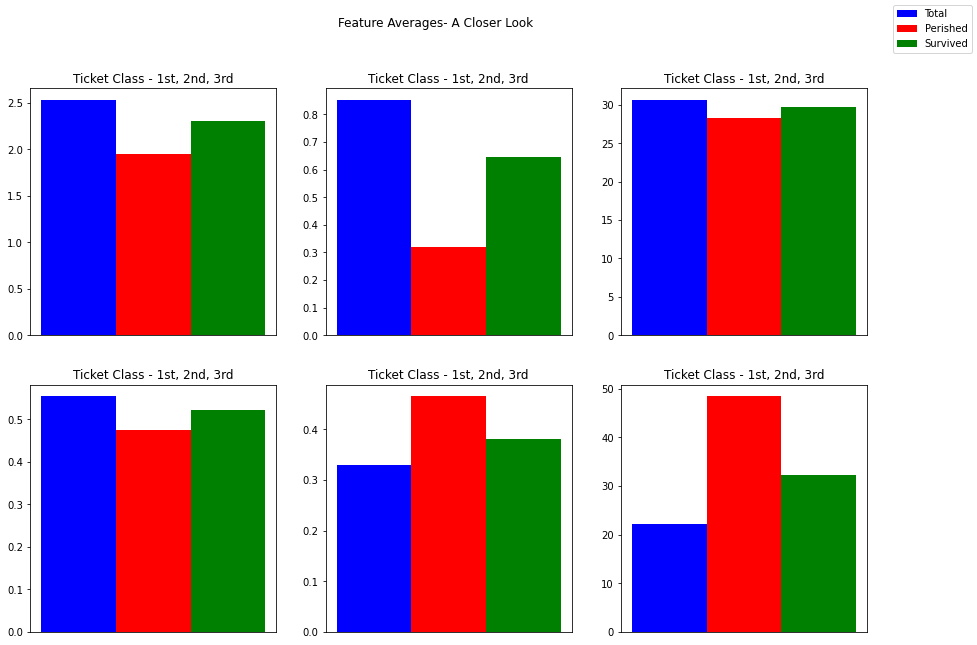

In [78]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
names = ['Ticket Class - 1st, 2nd, 3rd', 'Sex - 0 female, 1 male', 'Age','Number Siblings/Spouses Aboard','Number Parents/Children Aboard', 'Fare']
Pclass = dtitanic['Pclass']
Sex = dtitanic['Sex']
Age = dtitanic['Age']
SibSp = dtitanic['SibSp']
Parch = dtitanic['Parch']
Fare = dtitanic['Fare']
titles = ['Total', 'Perished', 'Survived']
ax[0,0].bar(x=0, height=0, width=0, color='blue', label = 'Total')
ax[0,0].bar(x=0, height=0, width=0, color='red', label = 'Perished')
ax[0,0].bar(x=0, height=0, width=0, color='green', label = 'Survived')

ax[0,0].bar(x=[0,.5,1], height=Pclass, width=.5, color=['blue','red','green'])
ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].set_title(names[0])

ax[0,1].bar(x=[0,.5,1], height=Sex, width=.5, color=['blue','red','green'])
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].set_title(names[0])

ax[0,2].bar(x=[0,.5,1], height=Age, width=.5, color=['blue','red','green'])
ax[0,2].axes.xaxis.set_visible(False)
ax[0,2].set_title(names[0])

ax[1,0].bar(x=[0,.5,1], height=SibSp, width=.5, color=['blue','red','green'])
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].set_title(names[0])

ax[1,1].bar(x=[0,.5,1], height=Parch, width=.5, color=['blue','red','green'])
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].set_title(names[0])

ax[1,2].bar(x=[0,.5,1], height=Fare, width=.5, color=['blue','red','green'])
ax[1,2].axes.xaxis.set_visible(False)
ax[1,2].set_title(names[0])

fig.legend()
fig.suptitle("Feature Averages- A Closer Look")
plt.show()

In [71]:
titanic_df.corr()['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

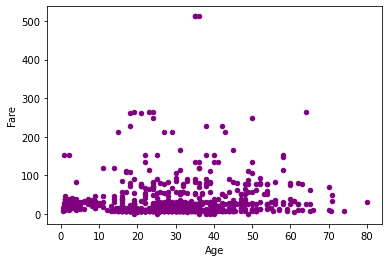

In [70]:
titanic_df.plot(kind='scatter',x='Age',y='Fare',color='purple')
plt.show()